# Weapon Expected Damage

## Setup

In [1]:
import pandas as pd
from decimal import Decimal
from scipy.stats import binom
from scripts.probability import at_least_one

## Example: X-Com Rifle

Having:

- A rifle
- With 60% chance to hit with a burst of 1
- With 35% chance to hit with a burst of 3
- Damage of 30

We want to know:

- The expected damage

## At Least One

Getting the chance of at least one hit gives us a lower bound.

### Single Shot

In [2]:
at_least_one_single = at_least_one(0.6, 1)
at_least_one_single * 30

18.0

### Burst

In [3]:
at_least_one_burst = at_least_one(0.35, 3)
at_least_one_burst * 30

21.76125

### Final

In [4]:
(at_least_one_single + at_least_one_burst) / 2 * 30

19.880625

## Binomial Distribution

### Single Shot

In [5]:
values = []
n = 1
p = 0.6

for i in range(0, n + 1, 1):
    values.append(binom.pmf(i, n, p))
d = {"chance": values}
binomial_single = pd.DataFrame(data=d)
binomial_single['trials'] = binomial_single.index
binomial_single

,chance,trials
0,0.4,0
1,0.6,1


In [6]:
binomial_single["damage"] = binomial_single.apply(lambda x: 30 * x["trials"], axis=1)
binomial_single["expected_damage"] = binomial_single.apply(lambda x: p * x["damage"], axis=1)
binomial_single

,chance,trials,damage,expected_damage
0,0.4,0,0.0,0.0
1,0.6,1,30.0,18.0


Text(0, 0.5, 'Average damage')

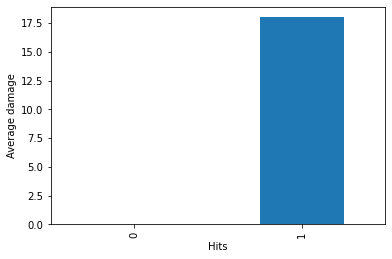

In [7]:
ax = binomial_single.plot.bar(x="trials", y="expected_damage", legend=False)
ax.set_xlabel("Hits")
ax.set_ylabel("Average damage")

### Burst

In [8]:
values = []
n = 3
p = 0.6

for i in range(0, n + 1, 1):
    values.append(binom.pmf(i, n, p))
d = {"chance": values}
binomial_burst = pd.DataFrame(data=d)
binomial_burst['trials'] = binomial_burst.index
binomial_burst

,chance,trials
0,0.064,0
1,0.288,1
2,0.432,2
3,0.216,3


In [9]:
binomial_burst["damage"] = binomial_burst.apply(lambda x: 30 * x["trials"], axis=1)
binomial_burst["expected_damage"] = binomial_burst.apply(lambda x: p * x["damage"], axis=1)
binomial_burst

,chance,trials,damage,expected_damage
0,0.064,0,0.0,0.0
1,0.288,1,30.0,18.0
2,0.432,2,60.0,36.0
3,0.216,3,90.0,54.0


Text(0, 0.5, 'Average damage')

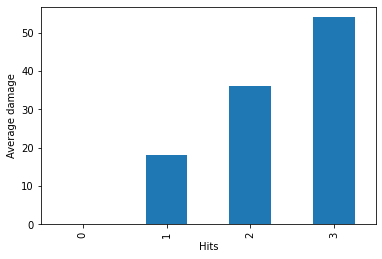

In [10]:
ax = binomial_burst.plot.bar(x="trials", y="expected_damage", legend=False)
ax.set_xlabel("Hits")
ax.set_ylabel("Average damage")

## Binomial Mean

The chance to hit follows a binomial distribution. So it seems logical to use the binomial mean.

### Single Shot

In [11]:
mean_single = binom.mean(1, 0.6)
mean_single * 30

18.0

### Burst

In [12]:
mean_burst = binom.mean(3, 0.35)
mean_burst * 30

31.499999999999993

### Final

In [13]:
(mean_single + mean_burst) / 2  * 30

24.75

## Binomial Values Mean

We already have all the average results. Can't they be used to get the expected damage?

The value for a single shot makes no sense. So we will reject this.

### Single Shot

In [14]:
binomial_single["expected_damage"].mean()

9.0

### Burst

In [15]:
binomial_burst["expected_damage"].mean()

27.0